# IT496: Introduction to Data Mining (IDM)
# Course Project - 2
Made with ❤️ by Kunj Kapadiya (202103018) of DOPE-a-MINE (Team-18)

### Book Depository Dataset

This dataset contains a large collection of books that are indexed/scraped from bookdepository.com, not the actual contents of the books but their metadata like title, description, category(ies), cover image, physical attributes, and others. This dataset could be used for natural language processing, text classification, computer vision, and other machine learning tasks. Below is the list of fields of the dataset:

1. ``[int]`` **authors** - Author(s) of the book (*authors.csv* containing the mapping)
1. ``int`` **bestsellers-rank** - Bestsellers rank of the book on the website
1. ``[int]`` **categories** - Categories (and genres) of the book (*categories.csv* containing the mapping)
1. ``str`` **description** - Description of the book
1. ``float`` **dimension-x** - X-Dimension of the book (in cms)
1. ``float`` **dimension-y** - Y-Dimension of the book (in cms)
1. ``float`` **dimension-z** - Z-Dimension of the book (in mms)
1. ``str`` **edition** - Edition of the book
1. ``str`` **edition-statement** - Edition statement of the book
1. ``str`` **for-ages** - Suitable (or recommended) age(s) of the readers
1. ``int`` **format** - Format of the book (*formats.csv* containing the mapping)
1. ``int`` **id** - Unique identifier of the data tuple
1. ``str`` **illustrations-note** - Note on the illustrations contained in the book
1. ``str`` **image-checksum** - Book's cover image checksum
1. ``str`` **image-path** - Book's cover image file path
1. ``str`` **image-url** - Book's cover image URL
1. ``str`` **imprint** - Imprint (i.e. publisher's specialized subsidiary) of the book
1. ``str`` **index-date** - Date on which the data tuple was indexed/scraped from the website
1. ``str`` **isbn10** - ISBN-10 number of the book
1. ``str`` **isbn13** - ISBN-13 number of the book
1. ``str`` **lang** - Language in which the book is written
1. ``str`` **publication-date** - Publication date of the book
1. ``int`` **publication-place** - Publication place of the book (*places.csv* containing the mapping)
1. ``float`` **rating-avg** - Average rating of the book on the website (b/w 1 & 5)
1. ``int`` **rating-count** - Number of ratings of the book on the website
1. ``str`` **title** - Title of the book
1. ``str`` **url** - Relative URL of the book on the website (https://bookdepository.com + url)
1. ``float`` **weight** - Weight of the book (in gms)

Dataset Link: https://www.kaggle.com/datasets/sp1thas/book-depository-dataset


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./dataset/dataset.csv")
df_c = pd.read_csv("./dataset/categories.csv")
df_f = pd.read_csv("./dataset/formats.csv")

df = df.drop(columns=["authors", "edition", "edition-statement", "for-ages", "illustrations-note", "image-checksum", "image-path", "image-url", "imprint", "index-date", "isbn10", "isbn13", "publication-place", "url"])
df["publication-date"] = pd.to_datetime(df["publication-date"])

In [3]:
df.shape

(1109383, 14)

In [4]:
df.dtypes

bestsellers-rank           float64
categories                  object
description                 object
dimension-x                float64
dimension-y                float64
dimension-z                float64
format                     float64
id                           int64
lang                        object
publication-date    datetime64[ns]
rating-avg                 float64
rating-count               float64
title                       object
weight                     float64
dtype: object

In [5]:
df.isnull().sum()

bestsellers-rank    466842
categories               0
description          80087
dimension-x          48227
dimension-y          93531
dimension-z          48227
format                6622
id                       0
lang                 60407
publication-date      2603
rating-avg          440130
rating-count        440130
title                    0
weight               87173
dtype: int64

In [6]:
df[["rating-avg", "rating-count", "dimension-x", "dimension-y", "dimension-z", "weight"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating-avg,669253.0,3.974918,0.543605,1.00,3.73,4.00,4.26,5.0
rating-count,669253.0,12392.154477,133326.347285,1.00,5.00,39.00,520.00,7377337.0
dimension-x,1061156.0,160.765941,38.026712,0.25,138.00,152.00,178.00,3871.0
dimension-y,1015852.0,224.910202,43.473223,1.00,203.00,229.00,242.00,2000.0
dimension-z,1061156.0,26.441173,47.798689,0.10,9.00,15.75,25.00,2000.0
weight,1022210.0,461.662281,658.761829,15.00,181.44,318.00,535.24,82522.0


In [7]:
df.head()

,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,format,id,lang,publication-date,rating-avg,rating-count,title,weight
0,49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.0,1.0,9781840189070,en,2004-10-14,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,224.00
1,115215.0,"[235, 3386]",John Moran and Carl Williams were the two bigg...,127.0,203.2,25.4,1.0,9781844547371,en,2009-03-13,3.60,335.0,Underbelly : The Gangland War,285.76
2,11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.0,1.0,9788416327867,es,2020-04-30,3.88,37211.0,"A Sir Phillip, Con Amor",386.00
3,114379.0,"[377, 2978, 2980]",The Third Book of General Ignorance gathers t...,153.0,234.0,24.0,1.0,9780571308996,en,2015-10-01,4.17,384.0,QI: The Third Book of General Ignorance,436.00
4,98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.0,2.0,9780008352516,en,2019-06-18,3.90,5095.0,The Hidden Power of F*cking Up,980.00


<Axes: ylabel='Languages'>

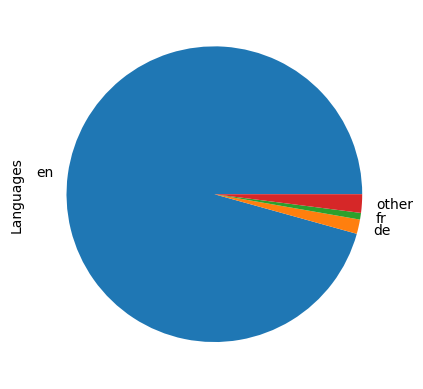

In [8]:
df_temp = df.groupby(df["lang"].dropna()).id.count().sort_values(ascending=False)
df_temp["other"] = df_temp[3:].sum()
df_temp[["en", "de", "fr", "other"]].plot(kind="pie", ylabel="Languages")

<Axes: xlabel='Publication Year', ylabel='Books'>

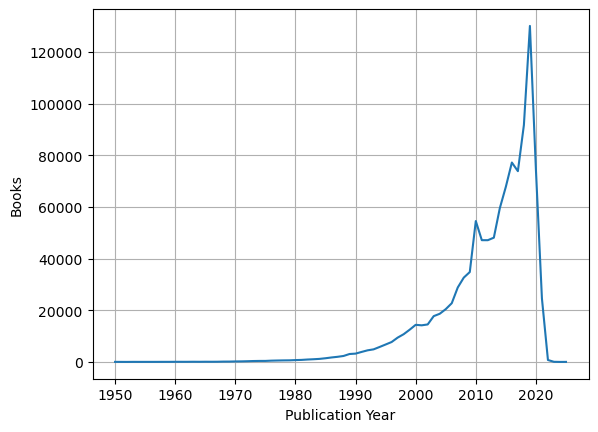

In [9]:
df_temp = df.groupby(df["publication-date"].dt.year.dropna()).id.count()[1950:2025]
df_temp.plot(xlabel="Publication Year", ylabel="Books", grid=True)

<Axes: xlabel='Average Rating', ylabel='Books'>

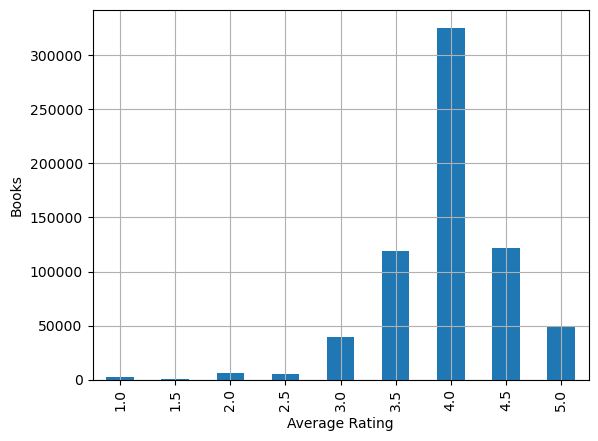

In [10]:
df_temp = df.groupby(df["rating-avg"].dropna().apply(lambda x: round(x*2)/2)).id.count()
df_temp.plot(kind="bar", xlabel="Average Rating", ylabel="Books", grid=True)

<Axes: xlabel='rating-count', ylabel='bestsellers-rank'>

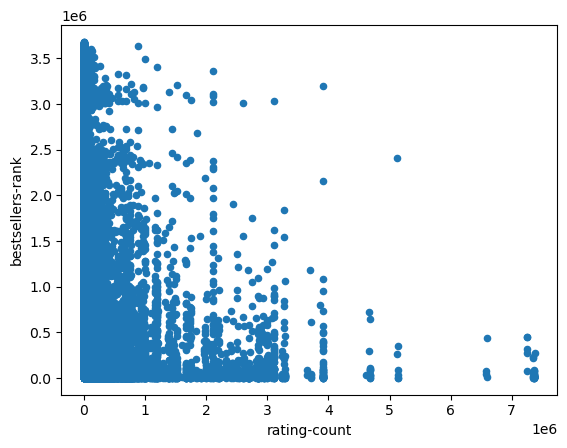

In [11]:
df[["rating-count", "bestsellers-rank"]].dropna().plot(kind="scatter", x="rating-count", y="bestsellers-rank")

In [12]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [13]:
df = df[['dimension-x', 'dimension-y', 'dimension-z', 'weight', 'format']].dropna()
X = df[['dimension-x', 'dimension-y', 'dimension-z', 'weight']]
y = df['format']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [10, 20, 30],
  'min_samples_split': [10, 50, 100],
  'min_samples_leaf':  [4 , 40 , 100],
}

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [14]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)